## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [ ]:
!pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.8 MB/s 
     |████████████████████████████████| 212 kB 73.4 MB/s 


In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.8.2


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [ ]:
dataset = nlp.load_dataset('emotion')

Downloading:   0%|          | 0.00/3.41k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.01k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/84e07cd366f4451464584cdbd4958f512bcaddb1e921341e07298ce8a9ce42f4. Subsequent calls will reuse this data.


In [ ]:
dataset

{'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [ ]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [ ]:
def get_tweets(data):
    tweets = [x['text'] for x in data]
    labels = [x['label'] for x in data]
    return tweets, labels

In [ ]:
tweets, labels = get_tweets(train)

In [ ]:
tweets[10], labels[10]

('i feel like i have to make the suffering i m seeing mean something',
 'sadness')

## Task 4: Tokenizer

1. Tokenizing the tweets

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')

tokenizer.fit_on_texts(tweets)

print(tokenizer.texts_to_sequences([tweets[10]]))

[[2, 3, 14, 2, 21, 5, 80, 6, 733, 2, 93, 544, 304, 84]]


## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

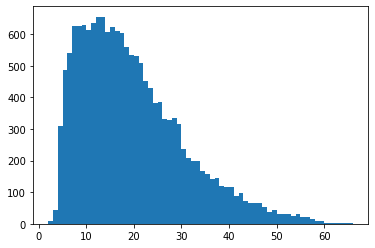

In [ ]:
lengths = [len(t.split(' ')) for t in tweets]

plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [ ]:

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=50, padding='post')
    return padded_sequences

In [ ]:
padded_train_sequences = get_sequences(tokenizer, tweets)

In [ ]:
padded_train_sequences[10]

array([  2,   3,  14,   2,  21,   5,  80,   6, 733,   2,  93, 544, 304,
        84,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [ ]:
classes = set(labels)
print(classes)

{'love', 'sadness', 'surprise', 'fear', 'anger', 'joy'}


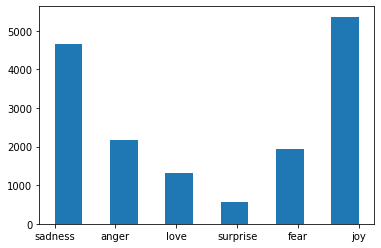

In [ ]:
plt.hist(labels, bins=11)
plt.show()

In [ ]:
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

In [ ]:
classes_to_index

{'love': 0, 'sadness': 1, 'surprise': 2, 'fear': 3, 'anger': 4, 'joy': 5}

In [ ]:
index_to_classes

{0: 'love', 1: 'sadness', 2: 'surprise', 3: 'fear', 4: 'anger', 5: 'joy'}

In [ ]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [ ]:
train_labels = names_to_ids(labels)
print(train_labels[10])

1


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [ ]:
val_tweets, val_labels = get_tweets(val)
val_sequences = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [ ]:
val_tweets[20], val_labels[20]

('i just know to begin with i am going to feel shy about it', 3)

In [ ]:
h = model.fit(
    padded_train_sequences, train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=15,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

Epoch 1/15
500/500 [==============================] - 17s 15ms/step - loss: 1.3300 - accuracy: 0.4698 - val_loss: 0.8662 - val_accuracy: 0.6615
Epoch 2/15
500/500 [==============================] - 6s 13ms/step - loss: 0.6065 - accuracy: 0.7759 - val_loss: 0.6101 - val_accuracy: 0.7795
Epoch 3/15
500/500 [==============================] - 6s 12ms/step - loss: 0.3745 - accuracy: 0.8713 - val_loss: 0.5294 - val_accuracy: 0.8375
Epoch 4/15
500/500 [==============================] - 6s 13ms/step - loss: 0.2636 - accuracy: 0.9147 - val_loss: 0.4692 - val_accuracy: 0.8600
Epoch 5/15
500/500 [==============================] - 6s 12ms/step - loss: 0.2121 - accuracy: 0.9358 - val_loss: 0.4502 - val_accuracy: 0.8595
Epoch 6/15
500/500 [==============================] - 6s 13ms/step - loss: 0.1730 - accuracy: 0.9488 - val_loss: 0.4621 - val_accuracy: 0.8680
Epoch 7/15
500/500 [==============================] - 6s 13ms/step - loss: 0.1539 - accuracy: 0.9531 - val_loss: 0.4568 - val_accuracy: 0.874

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

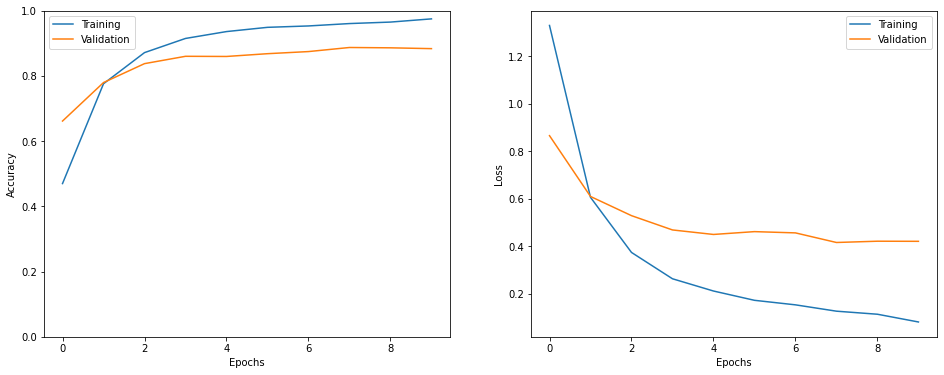

In [ ]:
show_history(h)

In [ ]:
test_tweets, test_labels = get_tweets(test)
test_sequences = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [ ]:
test_tweets[1]

'im updating my blog because i feel shitty'

In [ ]:
_ = model.evaluate(test_sequences, test_labels)

63/63 [==============================] - 0s 6ms/step - loss: 0.4101 - accuracy: 0.8840


In [ ]:
i = random.randint(0, len(test_labels) - 1)

In [ ]:
print('Tweet:', test_tweets[i])
print('Actual Emotion:', index_to_classes[test_labels[i]])

Tweet: i know for a fact that he treated everyone this way his love seemed boundless but he also made me feel important
Actual Emotion: joy


In [ ]:
test_tweets[i]

'i know for a fact that he treated everyone this way his love seemed boundless but he also made me feel important'

In [ ]:
test_sequences[i]

array([   2,   47,   16,    7,  310,    9,   66, 1284,  256,   23,   91,
        107,   85, 1392,    1,   19,   66,  117,  132,   18,    3,  281,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

In [ ]:
np.expand_dims(test_sequences[i], axis = 0)

array([[   2,  422,    9,    2,   24,    1,    1,   15,  387,    6, 8508,
           2,    3,  588,  284, 5346,  116,  187,   33,  246,   34,  256,
          22,    1,   12,    4,    1,    7,  973, 5128,   12,   11,  915,
           4,    2,    1,  106,    6,  165,  596,    1,    0,    0,    0,
           0,    0,    0,    0,    0,    0]], dtype=int32)

In [ ]:
np.expand_dims(test_sequences[i], axis = 0)[0]

array([   2,  422,    9,    2,   24,    1,    1,   15,  387,    6, 8508,
          2,    3,  588,  284, 5346,  116,  187,   33,  246,   34,  256,
         22,    1,   12,    4,    1,    7,  973, 5128,   12,   11,  915,
          4,    2,    1,  106,    6,  165,  596,    1,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

In [ ]:
pred_class = index_to_classes[np.argmax(p).astype('uint8')]


In [ ]:
print('Predicted Emotion:', pred_class)

In [ ]:
preds = np.argmax(model.predict(test_sequences), axis=1)
preds.shape, test_labels.shape

((2000,), (2000,))

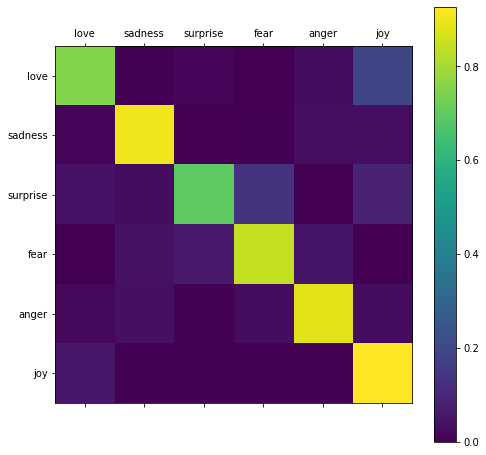

In [ ]:
show_confusion_matrix(test_labels, preds, list(classes))